# Bias in Education - Graduation Rates

In [761]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [762]:
uni_df = pd.read_excel('IPEDS_data.xlsx')
uni_df.shape

(1473, 145)

In [763]:
uni_df = uni_df.rename(columns = {
    
    'Percent of undergraduate enrollment that are American Indian or Alaska Native' : 'American Indian or Alaska Native',
    'Percent of undergraduate enrollment that are Asian' : 'Asian',
    'Percent of undergraduate enrollment that are Black or African American' : 'Black or African American',
    'Percent of undergraduate enrollment that are Hispanic/Latino' : 'Hispanic/Latino',
    'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander' : 'Native Hawaiian or other Islander',
    'Percent of undergraduate enrollment that are two or more races' : 'two or more races',
    'Percent of undergraduate enrollment that are Race/ethnicity unknown' : 'Race/ethnicity unknown',
    'Percent of undergraduate enrollment that are Nonresident Alien' : 'Nonresident Alien',
    'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander' : 'Asian/Native Hawaiian',
    'Percent of total enrollment that are White' : 'White',
    'Percent of undergraduate enrollment that are women' : 'Female',
    
    'Percent of freshmen submitting SAT scores' : 'Submitted SAT scores',
    'Percent of freshmen submitting ACT scores' : 'Submitted ACT scores',
    'SAT Critical Reading 25th percentile score' : 'SAT reading 25% socre',
    'SAT Critical Reading 75th percentile score' : 'SAT reading 75% score',
    'SAT Math 25th percentile score' : 'SAT math 25% score',
    'SAT Math 75th percentile score' : 'SAT math 75% score',
    'SAT Writing 25th percentile score' : 'SAT writing 25% score',
    'SAT Writing 75th percentile score' : 'SAT writing 75% score',
    'ACT Composite 25th percentile score' : 'ACT composite 25% score',
    'ACT Composite 75th percentile score' : 'ACT composite 75% score',    
    
    'Tuition and fees, 2012-13' : 'Tuition and fees',
    'Percent of freshmen receiving any financial aid' : 'Received financial aid',
    'Percent of freshmen receiving federal, state, local or institutional grant aid' : 'Received fed./state/local/inst. grant aid',
    'Percent of freshmen receiving federal grant aid' : 'Received federal grant aid',
    'Percent of freshmen receiving Pell grants' : 'Received Pell grants',
    'Percent of freshmen receiving other federal grant aid' : 'Received other federal grant aid',
    'Percent of freshmen receiving state/local grant aid' : 'Received state/local grant aid',
    'Percent of freshmen receiving institutional grant aid' : 'Received institutional grant aid',
    'Percent of freshmen receiving student loan aid' : 'Received student loan aid',
    'Percent of freshmen receiving federal student loans' : 'Received federal srudent loans',
    'Percent of freshmen receiving other loan aid' : 'Received other loan aid',
    
    'Graduation rate - Bachelor degree within 4 years, total' : 'Graduation rate in 4 years',
    'Graduation rate - Bachelor degree within 5 years, total' : 'Graduation rate in 5 years',
    'Graduation rate - Bachelor degree within 6 years, total' : 'Graduation rate in 6 years'
})

uni_df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Received federal grant aid,Received Pell grants,Received other federal grant aid,Received state/local grant aid,Received institutional grant aid,Received student loan aid,Received federal srudent loans,Received other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


### Race/sex

In [764]:
df_race_sex = uni_df[[
    'American Indian or Alaska Native',
    'Asian',
    'Black or African American',
    'Hispanic/Latino',
    'Native Hawaiian or other Islander',
    'two or more races',
    'Race/ethnicity unknown',
    'Nonresident Alien',
    'Asian/Native Hawaiian',
    'White',
    'Female',
    'Graduation rate in 4 years',
    'Graduation rate in 5 years',
    'Graduation rate in 6 years'
]]

df_race_sex = df_race_sex.dropna()

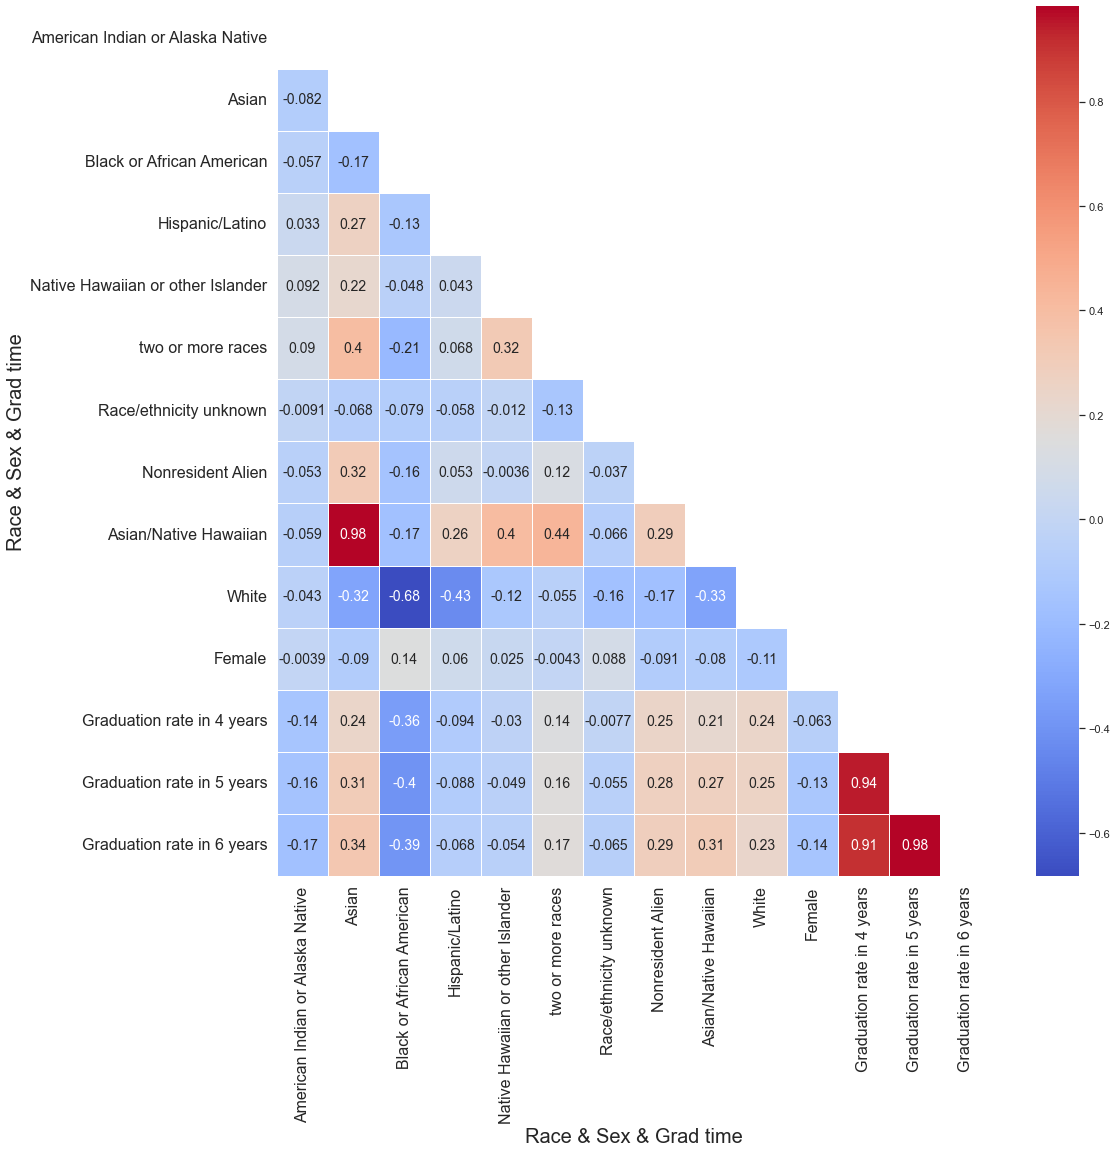

In [765]:
upp_mat = np.triu(df_race_sex.corr())
plt.figure(figsize=(16,16))
hm_race_sex = sns.heatmap(df_race_sex.corr(), 
                          annot=True, 
                          annot_kws={'size': 14}, 
                          linewidths=0.5, 
                          cmap=sns.color_palette('coolwarm', as_cmap=True), 
                          mask=upp_mat)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Race & Sex & Grad time", fontsize=20)
plt.ylabel("Race & Sex & Grad time", fontsize=20)
plt.savefig('cm_race_sex_grad.png', bbox_inches='tight')
plt.show()

### Test scores

In [766]:
df_sat_act = uni_df[[
    'Submitted SAT scores',
    'Submitted ACT scores',
    'SAT reading 25% socre',
    'SAT reading 75% score',
    'SAT math 25% score',
    'SAT math 75% score',
    'SAT writing 25% score',
    'SAT writing 75% score',
    'ACT composite 25% score',
    'ACT composite 75% score',

    'Graduation rate in 4 years',
    'Graduation rate in 5 years',
    'Graduation rate in 6 years'
]]

df_sat_act = df_sat_act.dropna()

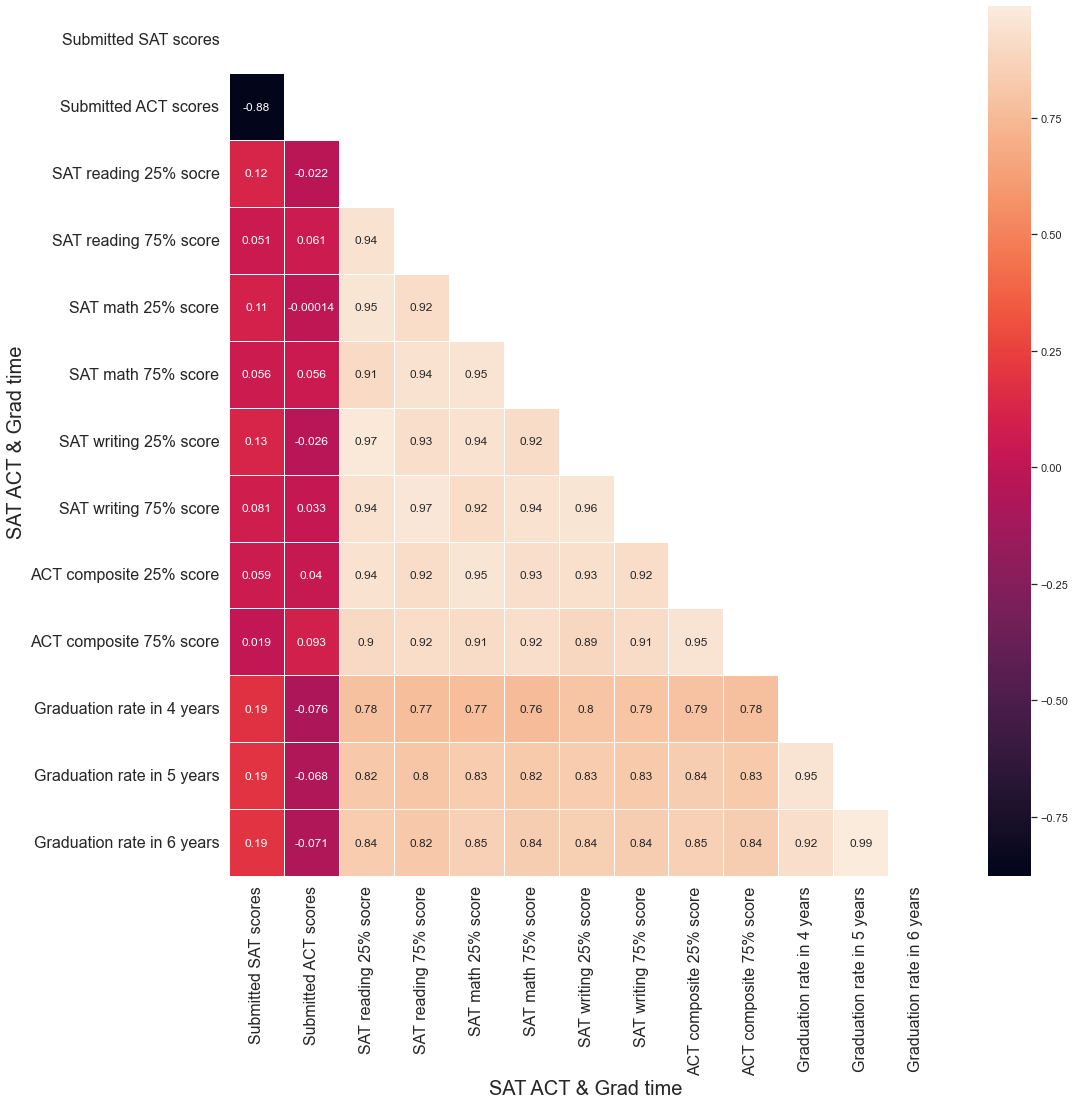

In [767]:
upp_mat = np.triu(df_sat_act.corr())
plt.figure(figsize=(16,16))
hm_sat_act = sns.heatmap(df_sat_act.corr(),
                         annot=True,
                         linewidths=.5,
                         cmap=sns.color_palette('rocket', as_cmap=True), 
                         mask=upp_mat)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('SAT ACT & Grad time', fontsize=20)
plt.ylabel('SAT ACT & Grad time', fontsize=20)
plt.savefig('cm_sat_act_grad.png', bbox_inches='tight')
plt.show()

### Financial aids

In [768]:
df_aid = uni_df[[
    'Received financial aid',
    'Received fed./state/local/inst. grant aid',
    'Received federal grant aid',
    'Received Pell grants',
    'Received other federal grant aid',
    'Received state/local grant aid',
    'Received institutional grant aid',
    'Received student loan aid',
    'Received federal srudent loans',
    'Received other loan aid',

    'Graduation rate in 4 years',
    'Graduation rate in 5 years',
    'Graduation rate in 6 years'
]]

df_aid = df_aid.dropna()

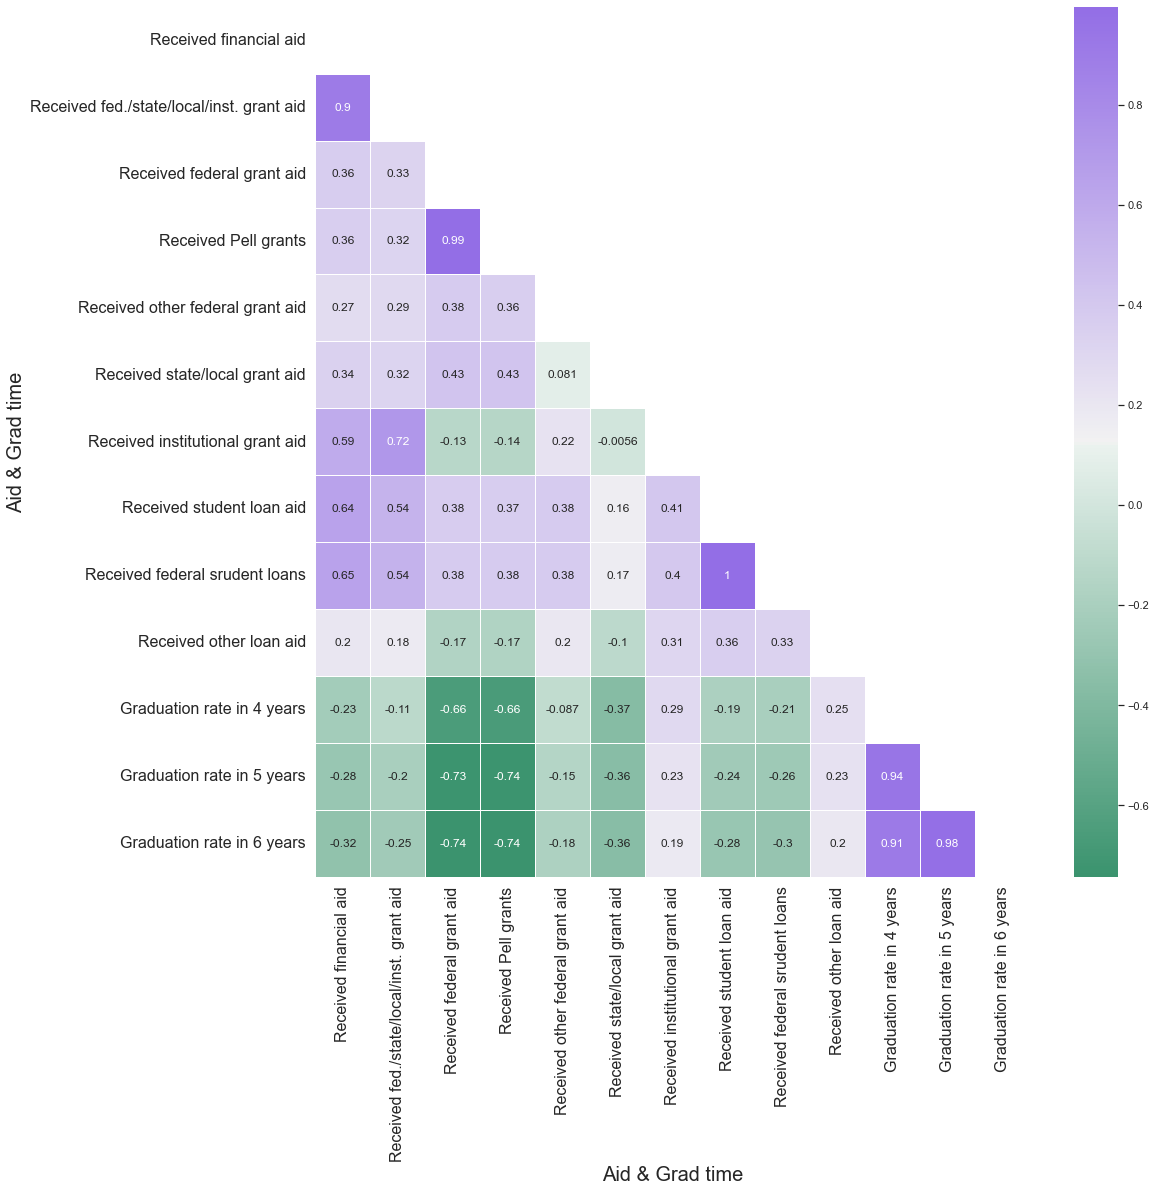

In [769]:
upp_mat = np.triu(df_aid.corr())
plt.figure(figsize=(16,16))
hm_aid = sns.heatmap(df_aid.corr(),
                     annot=True,
                     linewidths=.5,
                     cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True),
                     mask=upp_mat)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Aid & Grad time', fontsize=20)
plt.ylabel('Aid & Grad time', fontsize=20)
plt.savefig('cm_aid.png', bbox_inches='tight')
plt.show()

## Data Preprocess

In [770]:
df = uni_df

df_med_income = pd.read_csv('med_Income2013.csv', skiprows = 2)
df_med_income.head()

,Label (Grouping),Alabama!!Number!!Estimate,Alabama!!Percent Distribution!!Estimate,Alabama!!Median income (dollars)!!Estimate,Alaska!!Number!!Estimate,Alaska!!Percent Distribution!!Estimate,Alaska!!Median income (dollars)!!Estimate,Arizona!!Number!!Estimate,Arizona!!Percent Distribution!!Estimate,Arizona!!Median income (dollars)!!Estimate,...,West Virginia!!Median income (dollars)!!Estimate,Wisconsin!!Number!!Estimate,Wisconsin!!Percent Distribution!!Estimate,Wisconsin!!Median income (dollars)!!Estimate,Wyoming!!Number!!Estimate,Wyoming!!Percent Distribution!!Estimate,Wyoming!!Median income (dollars)!!Estimate,Puerto Rico!!Number!!Estimate,Puerto Rico!!Percent Distribution!!Estimate,Puerto Rico!!Median income (dollars)!!Estimate
0,HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATIN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Households,"1,888,504","1,888,504","52,035","255,173","255,173","77,790","2,643,430","2,643,430","61,529",...,"48,037","2,377,935","2,377,935","63,293","233,231","233,231","65,304","1,205,749","1,205,749","21,058"
2,One race--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"1,308,336",69.3%,"59,871","182,577",71.6%,"85,644","2,094,982",79.3%,"63,694",...,"48,670","2,093,441",88.0%,"66,073","216,778",92.9%,"66,028","716,113",59.4%,"22,076"
4,Black or African American,"495,426",26.2%,"35,239","8,362",3.3%,"64,054","110,292",4.2%,"49,418",...,"32,803","131,874",5.5%,"32,857","1,939",0.8%,"53,354","140,199",11.6%,"20,038"


In [771]:
df_med_col = list(df_med_income.columns)

dict_med_income = {}

for i in range(3, 157, 3):
    income = df_med_income.iloc[1,i]
    income = income.replace(',','')
    income = int(income)
    state = df_med_col[i]
    state = state.replace('!!Median income (dollars)!!Estimate','')
    dict_med_income[state] = income

print(dict_med_income)

{'Alabama': 52035, 'Alaska': 77790, 'Arizona': 61529, 'Arkansas': 49475, 'California': 78672, 'Colorado': 75231, 'Connecticut': 79855, 'Delaware': 69110, 'District of Columbia': 90842, 'Florida': 57703, 'Georgia': 61224, 'Hawaii': 83173, 'Idaho': 58915, 'Illinois': 68428, 'Indiana': 58235, 'Iowa': 61836, 'Kansas': 61091, 'Kentucky': 52238, 'Louisiana': 50800, 'Maine': 59489, 'Maryland': 87063, 'Massachusetts': 84385, 'Michigan': 59234, 'Minnesota': 73382, 'Mississippi': 46511, 'Missouri': 57290, 'Montana': 56539, 'Nebraska': 63015, 'Nevada': 62043, 'New Hampshire': 77923, 'New Jersey': 85245, 'New Mexico': 51243, 'New York': 71117, 'North Carolina': 56642, 'North Dakota': 65315, 'Ohio': 58116, 'Oklahoma': 53840, 'Oregon': 65667, 'Pennsylvania': 63627, 'Rhode Island': 70305, 'South Carolina': 54864, 'South Dakota': 59896, 'Tennessee': 54833, 'Texas': 63826, 'Utah': 74197, 'Vermont': 63477, 'Virginia': 76398, 'Washington': 77006, 'West Virginia': 48037, 'Wisconsin': 63293, 'Wyoming': 653

In [772]:
median_income = []

for i in df['State abbreviation']:
    median_income.append(dict_med_income[i])

df['Median Income'] = median_income

df = df.drop(columns='State abbreviation')

In [773]:
df = df[['Median Income', 'Enrolled total', 'SAT reading 25% socre', 'SAT math 25% score',  'ACT composite 25% score', 'Tuition and fees', 'White', 'Female', 'Graduation rate in 4 years']]

df = df.rename(columns = {
    'SAT reading 25% socre' : 'SAT Reading',
    'SAT math 25% score' : 'SAT Math',
    'ACT composite 25% score' : 'ACT Comp',
    'Tuition and fees' : 'Tuition',
    'White' : 'White Rate',
    'Female' : 'Female Rate',
    'Graduation rate in 4 years' : 'Graduation Rate'
})

In [774]:
df = df.dropna()
df.shape

(1105, 9)

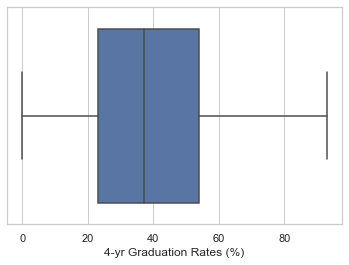

Graduation Rate    37.0
dtype: float64


In [775]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['Graduation Rate'])
plt.xlabel('4-yr Graduation Rates (%)')
plt.show()

df_rate = df[['Graduation Rate']]
print(df_rate.median())

## Linear Regression

In [776]:
import statsmodels.api as sm

In [777]:
y = df[['Graduation Rate']]
x = df[['Median Income', 'Enrolled total', 'SAT Reading', 'SAT Math',  'ACT Comp', 'Tuition', 'White Rate', 'Female Rate']]
x = sm.add_constant(x)
lin_model = sm.OLS(y, x).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Graduation Rate   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     428.4
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        01:02:01   Log-Likelihood:                -4160.8
No. Observations:                1105   AIC:                             8340.
Df Residuals:                    1096   BIC:                             8385.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -71.8314      3.782    -18.

## Logistic Regression

In [778]:
# Classified based on median
df['Graduation Rate'].loc[df['Graduation Rate'] <= df['Graduation Rate'].median()] = 0
df['Graduation Rate'].loc[df['Graduation Rate'] > df['Graduation Rate'].median()] = 1
df['Median Income'].loc[df['Median Income'] <= df['Median Income'].median()] = 0
df['Median Income'].loc[df['Median Income'] > df['Median Income'].median()] = 1

test_set = df.sample(frac =0.3, replace=False)
train_set = df[~df.index.isin(test_set.index)]

x_train = train_set.iloc[:, :-1]
x_test = test_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values


In [779]:
from sklearn.linear_model import LogisticRegression

In [780]:
log_model = LogisticRegression().fit(x_train, y_train)
accuracy = log_model.score(x_test, y_test)

print("Model accuracy: ", accuracy)

Model accuracy:  0.7409638554216867


### Confusion Matrix

In [781]:
from sklearn.metrics import confusion_matrix

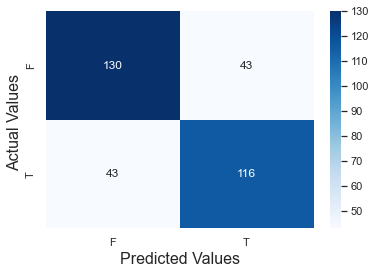

In [782]:
y_pred = log_model.predict(x_test)
c_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

conf_matrix = sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g')

conf_matrix.set_xlabel('Predicted Values', fontsize=16)
conf_matrix.set_ylabel('Actual Values ', fontsize=16);

conf_matrix.xaxis.set_ticklabels(['F','T'])
conf_matrix.yaxis.set_ticklabels(['F','T'])

plt.savefig('conf_matrix.png', bbox_inches='tight')
plt.show()

### Stat-parity and Equal-opp.

In [783]:
def stat_parity(preds, sens):
    n_p0 = 0
    n_p1 = 0
    n_yp0 = 0
    n_yp1 = 0
    for y_hat, p in zip(preds, sens):
        if p == 0:
            n_p0 += 1
            n_yp0 += int(y_hat)
        else:
            n_p1 += 1
            n_yp1 += int(y_hat)
    p11 = 0 if n_p1 == 0 else n_yp1 / n_p1
    p10 = 0 if n_p0 == 0 else n_yp0 / n_p0
    return p11 - p10

In [784]:
def eq_oppo(preds, sens, labels):  
    n11 = 0
    n10 = 0
    ny11 = 0
    ny10 = 0
    for y_hat, p, y in zip(preds, sens, labels):
        if y == 0:
            continue
        if p == 0:
            n10 += 1
            ny10 += int(y_hat)
        else:
            n11 += 1
            ny11 += int(y_hat)
    p11 = 0 if n11 == 0 else ny11 / n11
    p10 = 0 if n10 == 0 else ny10 / n10
    return p11 - p10

In [785]:
med_income_test = x_test['Median Income'].values

stat_parity = stat_parity(y_pred, med_income_test)
print('Statistical parity: ', stat_parity)

equal_opp = eq_oppo(y_pred, med_income_test, y_test)
print('Equality of opportunity: ', equal_opp)

Statistical parity:  0.10445211837659202
Equality of opportunity:  0.05270655270655267
